In [1]:
! pip show scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [2]:
! pip install --upgrade scikit-learn


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/1b/7c/66d34dc231a309cc3a7f3eeb848319be3b616fd2918db302aaef727eff4a/scikit_learn-1.3.1-cp39-cp39-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.5.0 from https://files.pythonhosted.org/packages/23/86/57a03f715b1398c6c5efa5e62e34d683b6c4b609b0e51df58d48aedde84a/scipy-1.11.3-cp39-cp39-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.4 kB ? eta -:--:--
     -------------------------------- ----- 51.2/60.4 kB 262.6 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 29

In [3]:
! pip install --upgrade imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for imbalanced-learn from https://files.pythonhosted.org/packages/a3/9e/fbe60a768502af54563dcb59ca7856f5a8833b3ad5ada658922e1ab09b7f/imbalanced_learn-0.11.0-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.11.0-py3-none-any.whl.metadata (8.3 kB)
Using cached imbalanced_learn-0.11.0-py3-none-any.whl (235 kB)


In [4]:
! pip install scikit-learn==<desired_version>


The syntax of the command is incorrect.


In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import imblearn
from imblearn.over_sampling import  SMOTE
import math
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
data = pd.read_csv('creditcard.csv')
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [9]:
data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [10]:
class1 = data[data['Class']==1]
class1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [11]:
temp = shuffle(class1)

In [12]:
temp

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
91671,63578.0,-0.639191,-0.085595,1.265452,1.401166,-0.260542,1.009795,1.301999,-0.135258,-0.431521,...,0.340331,0.760170,0.353377,-0.778893,-0.070681,-0.033355,-0.061962,-0.062687,290.18,1
150668,93860.0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52,1
39183,39729.0,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,...,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,776.83,1
251866,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1
215132,139951.0,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57615,47982.0,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,-1.973535,...,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134,0.76,1
77387,57027.0,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,1
172787,121238.0,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,-1.792343,...,0.870730,1.269473,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,144.62,1
17366,28658.0,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99,1


In [13]:
d1 = temp.iloc[:2000,:]
d1

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
91671,63578.0,-0.639191,-0.085595,1.265452,1.401166,-0.260542,1.009795,1.301999,-0.135258,-0.431521,...,0.340331,0.760170,0.353377,-0.778893,-0.070681,-0.033355,-0.061962,-0.062687,290.18,1
150668,93860.0,-10.632375,7.251936,-17.681072,8.204144,-10.166591,-4.510344,-12.981606,6.783589,-4.659330,...,2.715357,0.695603,-1.138122,0.459442,0.386337,0.522438,-1.416604,-0.488307,188.52,1
39183,39729.0,-0.964567,-1.643541,-0.187727,1.158253,-2.458336,0.852222,2.785163,-0.303609,0.940006,...,0.447180,0.536204,1.634061,0.203839,0.218749,-0.221886,-0.308555,-0.164500,776.83,1
251866,155535.0,0.711155,2.617105,-4.722363,5.842970,-0.600179,-1.646313,-2.785198,0.540368,-3.044029,...,0.360501,-0.865526,0.139978,-0.336238,0.128449,-0.155646,0.799460,0.392170,3.90,1
215132,139951.0,-2.921944,-0.228062,-5.877289,2.201884,-1.935440,0.631141,-1.245106,1.511348,-1.899987,...,1.441622,0.895528,1.385511,-2.028024,0.509131,0.172643,0.726781,0.234514,723.21,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57615,47982.0,-1.232804,2.244119,-1.703826,1.492536,-1.192985,-1.686110,-1.864612,0.856122,-1.973535,...,0.560475,0.165682,-0.013754,0.474935,-0.218725,0.302809,0.466031,0.250134,0.76,1
77387,57027.0,-2.335655,2.225380,-3.379450,2.178538,-3.568264,0.316814,-1.734948,1.449139,-1.980033,...,0.785540,0.297412,0.308536,-0.598416,-0.121850,-0.491018,0.701606,0.206966,444.17,1
172787,121238.0,-2.628922,2.275636,-3.745369,1.226948,-1.132966,-1.256353,-1.752420,0.281736,-1.792343,...,0.870730,1.269473,-0.265494,-0.480549,0.169665,0.096081,0.070036,0.063768,144.62,1
17366,28658.0,-28.524268,15.876923,-29.468732,6.447591,-20.786000,-4.865613,-19.501084,18.748872,-3.642990,...,1.805770,-2.119376,-1.317450,0.169846,2.051687,-0.210502,1.301734,0.380246,99.99,1


In [14]:
d1.shape

(492, 31)

In [15]:
X=data.iloc[ : ,:-1]
Y=data.iloc[: , -1]

In [16]:
# imbalance data handling
oversample=SMOTE()
X,Y=oversample.fit_resample(X,Y)

In [17]:
X.shape,Y.shape

((568630, 30), (568630,))

In [18]:
X=pd.DataFrame(X)
Y=pd.DataFrame(Y)
names=['Time','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25','V26','V27','V28','Amount','Class']
data=pd.concat([X,Y],axis=1)
d=data.values
data=pd.DataFrame(d,columns=names)

In [19]:
data

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0.0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0.0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0.0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0.0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,68315.932015,-2.716842,3.101986,-1.922280,1.558358,-2.355201,1.317916,-5.654794,-10.224571,-0.180108,...,7.121941,-2.809011,1.461376,0.332712,0.454963,-0.264090,0.406272,0.282925,14.500308,1.0
568626,149576.254399,-4.232268,1.397079,-3.889409,2.938090,-0.000026,-2.023895,-2.828401,-0.842028,0.932182,...,-0.138534,-0.902599,-0.667615,-0.353341,0.061508,-1.136987,-1.779633,0.713467,1.098339,1.0
568627,128784.798011,-2.538616,2.911515,-4.817078,2.241866,-1.414868,-0.378750,-2.389324,1.026675,-1.164883,...,1.413869,0.577920,0.013452,0.301588,-0.026074,-0.327010,0.539056,0.192418,160.594578,1.0
568628,86903.585879,-0.911819,0.453933,0.151273,2.674081,-2.111687,2.281271,0.975562,-4.075762,-0.219680,...,-1.955698,0.914739,0.431560,0.497389,0.429829,-0.067047,0.060862,-0.339977,500.789591,1.0


In [20]:
data['Class'].value_counts()

Class
0.0    284315
1.0    284315
Name: count, dtype: int64

<Axes: >

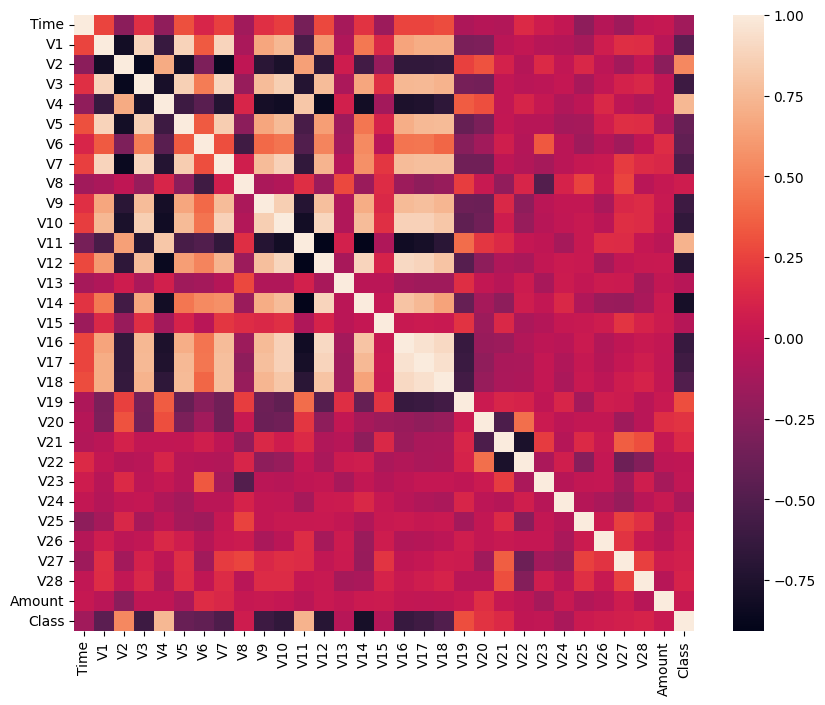

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.figure(figsize=(10,8))
sns.heatmap(data.corr())

In [26]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Class', axis=1), data['Class'], test_size=0.3, random_state=42)

In [27]:
cols= ['V22', 'V24', 'V25', 'V26', 'V27', 'V28']

In [28]:
scaler = StandardScaler()

In [29]:
frames= ['Time', 'Amount']

In [30]:
x= data[frames]

d_temp = data.drop(frames, axis=1)

temp_col=scaler.fit_transform(x)

scaled_col = pd.DataFrame(temp_col, columns=frames)



d_scaled = pd.concat([scaled_col, d_temp], axis =1)
d_scaled.head()

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.825112,0.244910,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-1.825112,-0.421404,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.825091,1.283585,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-1.825091,0.126458,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.825070,-0.116204,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0


In [31]:
x= data[frames]

In [32]:
x

,Time,Amount
0,0.000000,149.620000
1,0.000000,2.690000
2,1.000000,378.660000
3,1.000000,123.500000
4,2.000000,69.990000
...,...,...
568625,68315.932015,14.500308
568626,149576.254399,1.098339
568627,128784.798011,160.594578
568628,86903.585879,500.789591


In [33]:
d_temp = data.drop(frames, axis=1)

In [34]:
d_temp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-2.716842,3.101986,-1.922280,1.558358,-2.355201,1.317916,-5.654794,-10.224571,-0.180108,-0.988837,...,-1.374848,7.121941,-2.809011,1.461376,0.332712,0.454963,-0.264090,0.406272,0.282925,1.0
568626,-4.232268,1.397079,-3.889409,2.938090,-0.000026,-2.023895,-2.828401,-0.842028,0.932182,-3.225509,...,-0.184013,-0.138534,-0.902599,-0.667615,-0.353341,0.061508,-1.136987,-1.779633,0.713467,1.0
568627,-2.538616,2.911515,-4.817078,2.241866,-1.414868,-0.378750,-2.389324,1.026675,-1.164883,-5.208296,...,-0.259644,1.413869,0.577920,0.013452,0.301588,-0.026074,-0.327010,0.539056,0.192418,1.0
568628,-0.911819,0.453933,0.151273,2.674081,-2.111687,2.281271,0.975562,-4.075762,-0.219680,-0.649320,...,0.435746,-1.955698,0.914739,0.431560,0.497389,0.429829,-0.067047,0.060862,-0.339977,1.0


In [35]:
temp_col=scaler.fit_transform(x)

In [36]:
scaled_col = pd.DataFrame(temp_col, columns=frames)

In [37]:
scaled_col

,Time,Amount
0,-1.825112,0.244910
1,-1.825112,-0.421404
2,-1.825091,1.283585
3,-1.825091,0.126458
4,-1.825070,-0.116204
...,...,...
568625,-0.405472,-0.367845
568626,1.283158,-0.428622
568627,0.851101,0.294679
568628,-0.019212,1.837431


In [38]:
d_scaled = pd.concat([scaled_col, d_temp], axis =1)

In [39]:
d_scaled

,Time,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.825112,0.244910,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0
1,-1.825112,-0.421404,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0
2,-1.825091,1.283585,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0
3,-1.825091,0.126458,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0
4,-1.825070,-0.116204,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.405472,-0.367845,-2.716842,3.101986,-1.922280,1.558358,-2.355201,1.317916,-5.654794,-10.224571,...,-1.374848,7.121941,-2.809011,1.461376,0.332712,0.454963,-0.264090,0.406272,0.282925,1.0
568626,1.283158,-0.428622,-4.232268,1.397079,-3.889409,2.938090,-0.000026,-2.023895,-2.828401,-0.842028,...,-0.184013,-0.138534,-0.902599,-0.667615,-0.353341,0.061508,-1.136987,-1.779633,0.713467,1.0
568627,0.851101,0.294679,-2.538616,2.911515,-4.817078,2.241866,-1.414868,-0.378750,-2.389324,1.026675,...,-0.259644,1.413869,0.577920,0.013452,0.301588,-0.026074,-0.327010,0.539056,0.192418,1.0
568628,-0.019212,1.837431,-0.911819,0.453933,0.151273,2.674081,-2.111687,2.281271,0.975562,-4.075762,...,0.435746,-1.955698,0.914739,0.431560,0.497389,0.429829,-0.067047,0.060862,-0.339977,1.0


In [40]:
pca = PCA(n_components=7)

In [41]:
X_temp_reduced = pca.fit_transform(d_scaled)

In [42]:
pca.explained_variance_ratio_

array([0.67956375, 0.09828661, 0.07938208, 0.03344856, 0.03240843,
       0.01046948, 0.0078856 ])

In [43]:
pca.explained_variance_

array([209.61616115,  30.3171866 ,  24.48595399,  10.31744208,
         9.99660619,   3.22938529,   2.43236916])

In [44]:
names=['Time','Amount','Transaction Method','Transaction Id','Location','Type of Card','Bank']

In [45]:
X_reduced= pd.DataFrame(X_temp_reduced,columns=names)
X_reduced.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank
0,-9.743225,0.616678,1.154734,-0.500256,-1.684999,0.907212,-1.039620
1,-9.756966,0.439965,1.089814,0.026397,-0.566118,-1.115215,-0.390287
2,-9.840523,0.528938,1.148006,-0.485123,-1.782438,1.607852,0.742507
3,-9.894762,0.655689,1.471507,-0.438396,-1.758479,0.235311,-0.709937
4,-9.701328,0.857416,1.452695,-0.932107,-1.379956,-0.022652,-0.971531


In [46]:
Y=d_scaled['Class']
new_data=pd.concat([X_reduced,Y],axis=1)
new_data.head()

,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank,Class
0,-9.743225,0.616678,1.154734,-0.500256,-1.684999,0.907212,-1.039620,0.0
1,-9.756966,0.439965,1.089814,0.026397,-0.566118,-1.115215,-0.390287,0.0
2,-9.840523,0.528938,1.148006,-0.485123,-1.782438,1.607852,0.742507,0.0
3,-9.894762,0.655689,1.471507,-0.438396,-1.758479,0.235311,-0.709937,0.0
4,-9.701328,0.857416,1.452695,-0.932107,-1.379956,-0.022652,-0.971531,0.0


In [47]:
new_data.to_csv('finaldata.csv')

In [48]:
new_data.to_csv('finaldata.csv')

In [49]:
df = pd.read_csv('finaldata.csv')
df.head()

,Unnamed: 0,Time,Amount,Transaction Method,Transaction Id,Location,Type of Card,Bank,Class
0,0,-9.743225,0.616678,1.154734,-0.500256,-1.684999,0.907212,-1.039620,0.0
1,1,-9.756966,0.439965,1.089814,0.026397,-0.566118,-1.115215,-0.390287,0.0
2,2,-9.840523,0.528938,1.148006,-0.485123,-1.782438,1.607852,0.742507,0.0
3,3,-9.894762,0.655689,1.471507,-0.438396,-1.758479,0.235311,-0.709937,0.0
4,4,-9.701328,0.857416,1.452695,-0.932107,-1.379956,-0.022652,-0.971531,0.0


In [50]:
df = df.iloc[:,1:]

In [51]:
x = df.drop(['Class'],axis=1)
y = df['Class']

In [52]:
X_train, X_test, y_train, y_test= train_test_split(x,y, test_size = 0.30, random_state = 42)

In [53]:
X_train.shape, X_test.shape

((398041, 7), (170589, 7))

In [54]:
svc_param2=SVC(kernel='rbf',gamma=0.01,C=100)


In [55]:
svc_param2.fit(X_train,y_train)

In [ ]:
import pickle
# Saving model to disk
pickle.dump(svc_param2, open('model2.pkl','wb'))

In [ ]:
y_pred = svc_param2.predict(X_test)

In [ ]:

from sklearn.metrics import accuracy_score , classification_report, confusion_matrix, precision_recall_curve, f1_score, auc

print(classification_report(y_test,y_pred))print(classification_report(y_test,y_pred))

NameError: name 'classification_report' is not defined

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
X_test.values[0]

In [ ]:
new_data.head()

In [ ]:
X_test.values[5]

In [ ]:
X_test.values[6:11]